In [1]:
%matplotlib widget
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [2]:
%load_ext autoreload
%autoreload 2
%aimport help_func

from help_func import *
from help_fischer import *

In [3]:
# Base folder
base_folder = Path.cwd().parent / "data" / "exp2_box_ISI300"
# Define channel names for plotting
channel_names = ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", 
                 "P8", "T8", "FC6", "F4", "F8", "AF4"]

# Ensure output folder exists
output_dir = Path("Fisher_scores")
output_dir.mkdir(exist_ok=True)

In [19]:
normalization = "A1"
feature_types = ["B3"]


12048
Drop row 12047 with repeated ux timestamp
Drop row 12046 with repeated ux timestamp
Drop row 12045 with repeated ux timestamp
Drop row 12044 with repeated ux timestamp
Drop row 12043 with repeated ux timestamp
Drop row 12042 with repeated ux timestamp
Drop row 12041 with repeated ux timestamp
Drop row 12040 with repeated ux timestamp
Drop row 12039 with repeated ux timestamp
Drop row 12038 with repeated ux timestamp
Drop row 12037 with repeated ux timestamp
Drop row 12036 with repeated ux timestamp
Drop row 12035 with repeated ux timestamp
Drop row 12034 with repeated ux timestamp
Drop row 12033 with repeated ux timestamp
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
12028    94.679590
12029    94.679590
12030    94.679590
12031    94.679590
12032    94.810159
Name: timestamp_ux, Length: 12033, dtype: float64
10592
Drop row 10591 with repeated ux timestamp
Drop row 10590 with repeated ux timestamp
Drop row 10589 

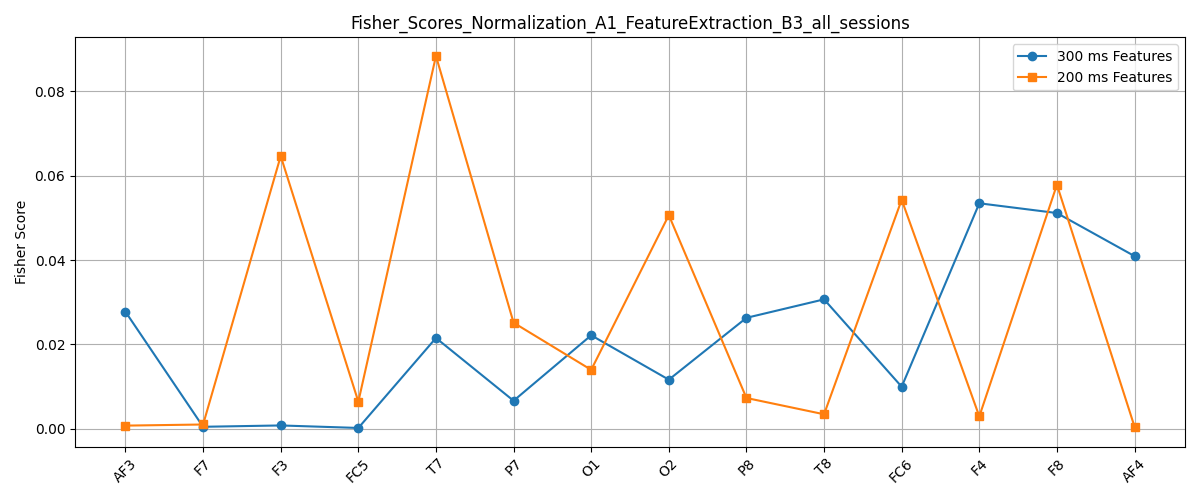

In [20]:
# Generate title for the plot
title = f"Fisher_Scores_Normalization_{normalization}_FeatureExtraction_{feature_types[0]}_all_sessions"

# Collect features and labels
X, y = collect_combined_features_all_sessions(
    base_folder=base_folder,
    normalization=normalization,
    feature_types=feature_types  # You can limit to ["B3"] or ["B5"] if needed
)
# Calculate Fisher scores
fisher_scores = fisher_score(X, y)
# Split the scores
fisher_300 = fisher_scores[:14]
fisher_200 = fisher_scores[14:]

# plotting
x = np.arange(len(channel_names))

plt.figure(figsize=(12, 5))
plt.plot(x, fisher_300, marker='o', label="300 ms Features")
plt.plot(x, fisher_200, marker='s', label="200 ms Features")

plt.xticks(x, channel_names, rotation=45)
plt.ylabel("Fisher Score")
plt.title(title)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Fisher_scores/Fisher_Scores_Normalization_{normalization}_FeatureExtraction_{feature_types[0]}_all_sessions.png", dpi=300)
plt.show()

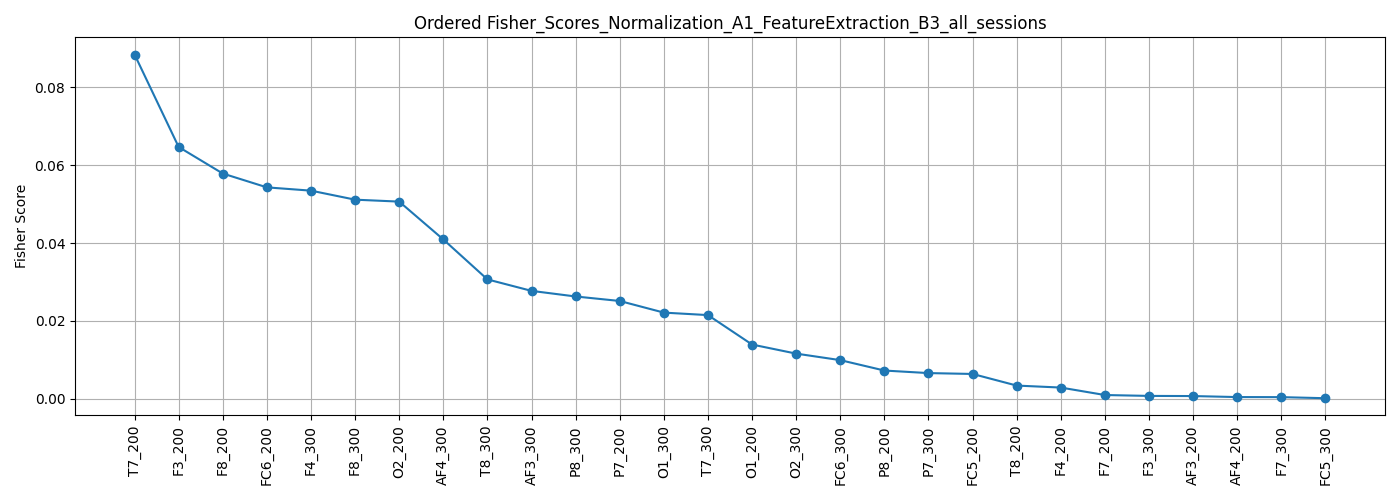

In [21]:
# === Ordered Plot ===
# Combine and label features
labels_300 = [f"{ch}_300" for ch in channel_names]
labels_200 = [f"{ch}_200" for ch in channel_names]
combined_labels = labels_300 + labels_200
combined_scores = np.concatenate([fisher_300, fisher_200])

# Sort
sorted_indices = np.argsort(combined_scores)[::-1]
sorted_scores = combined_scores[sorted_indices]
sorted_labels = [combined_labels[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(14, 5))
plt.plot(sorted_scores, marker='o')
plt.xticks(np.arange(len(sorted_labels)), sorted_labels, rotation=90)
plt.ylabel("Fisher Score")
plt.title("Ordered " + title)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"Fisher_scores/Ordered_Fisher_Scores_Normalization_{normalization}_FeatureExtraction_{feature_types[0]}_all_sessions.png", dpi=300)
plt.show()